A Univariate Time Series problem where the Sales is taken as a dependent variable in a dataset containing over 9,00,000 rows, and forecasting the sales for the next 24 months using Forecasting models like ARIMA and SARIMAX along with EDA and other techniques like using acf and pacf plots, decomposition, resampling, testing with ADFuller Test.
Sales Forecasting is useful in estimating future revenue by predicting the amount of product or services a sales unit will sell in the next week, month, quarter, or year.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("./Demand Forecasting.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


In [6]:
df.shape

(913000, 4)

In [7]:
print("Starting Date:", df.date.min())
print("Ending Date:", df.date.max())

Starting Date: 2013-01-01
Ending Date: 2017-12-31


In [8]:
df['date'] = pd.to_datetime(df['date'])

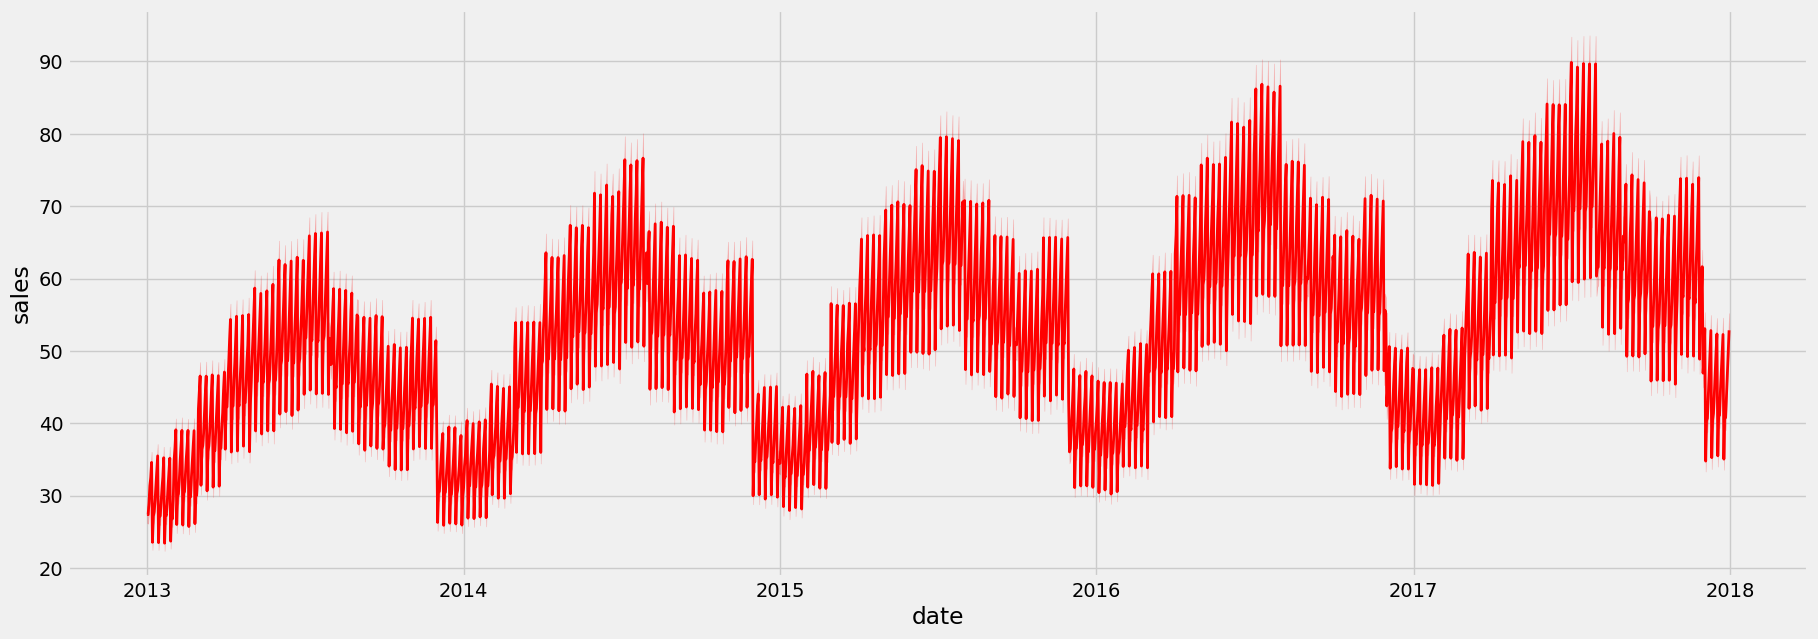

Increasing Trend over the years, and seasonality is present


In [9]:
# On complete data
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,7))
sns.lineplot(data=df, x='date', y='sales', color='red', lw=2)
plt.show()

print("Increasing Trend over the years, and seasonality is present")

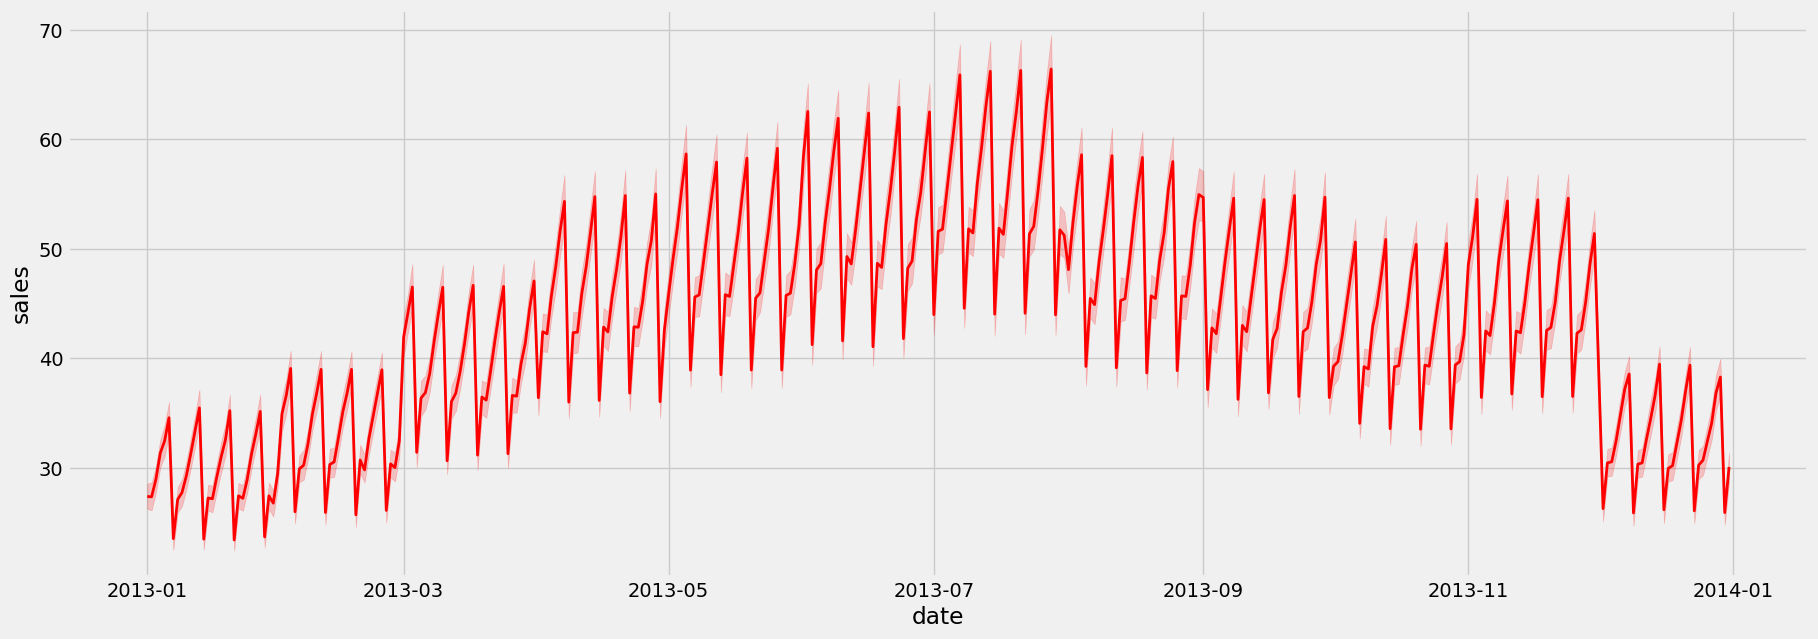

In [10]:
# On One Year data

plt.figure(figsize=(20,7))
yearly = df[(df['date'] >= '2013-01-01') & (df['date']< '2014-01-01')]
sns.lineplot(data=yearly, x='date', y='sales', color='red', lw=2)
plt.show()

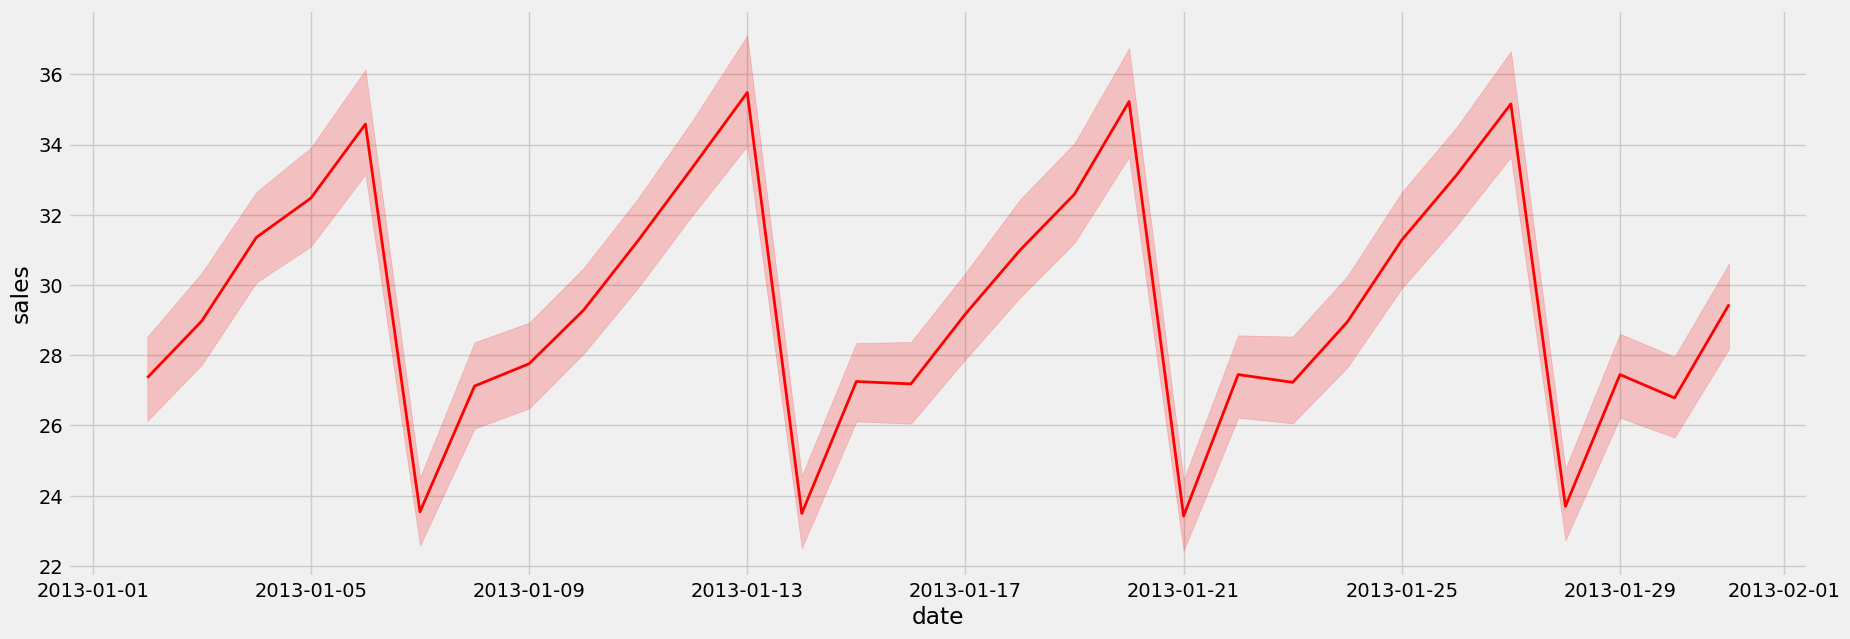

In [11]:
# On Monthly Data

monthly = df[(df['date']>'2013-01-01') & (df['date']< '2013-02-01')]
plt.figure(figsize=(20,7))
sns.lineplot(data=monthly, x='date', y='sales', color='red', lw=2)
plt.show()

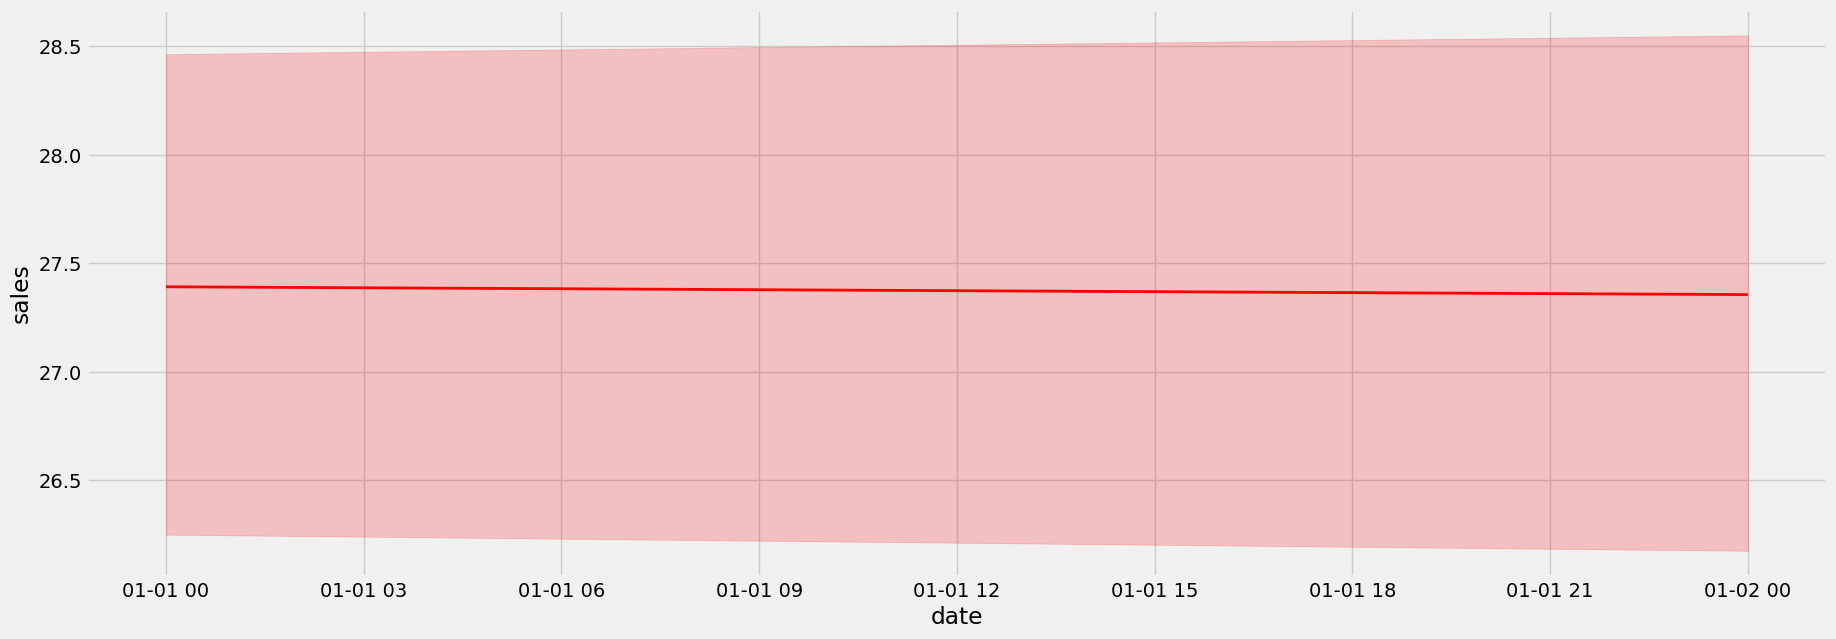

In [12]:
# One Day Data

day_df = df[(df['date']>='2013-01-01') & (df['date']< '2013-01-03')]
plt.figure(figsize=(20,7))
sns.lineplot(data=day_df, x='date', y='sales', color='red', lw=2)
plt.show()

In [13]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['week_of_year'] = (df.date.dt.isocalendar().week).astype(int)
df['day_of_week'] = df.date.dt.weekday
df['quarter'] = df.date.dt.quarter

In [14]:
df.head()

,date,store,item,sales,year,month,day,week_of_year,day_of_week,quarter
0,2013-01-01,1,1,13,2013,1,1,1,1,1
1,2013-01-02,1,1,11,2013,1,2,1,2,1
2,2013-01-03,1,1,14,2013,1,3,1,3,1
3,2013-01-04,1,1,13,2013,1,4,1,4,1
4,2013-01-05,1,1,10,2013,1,5,1,5,1


In [15]:
df.shape

(913000, 10)

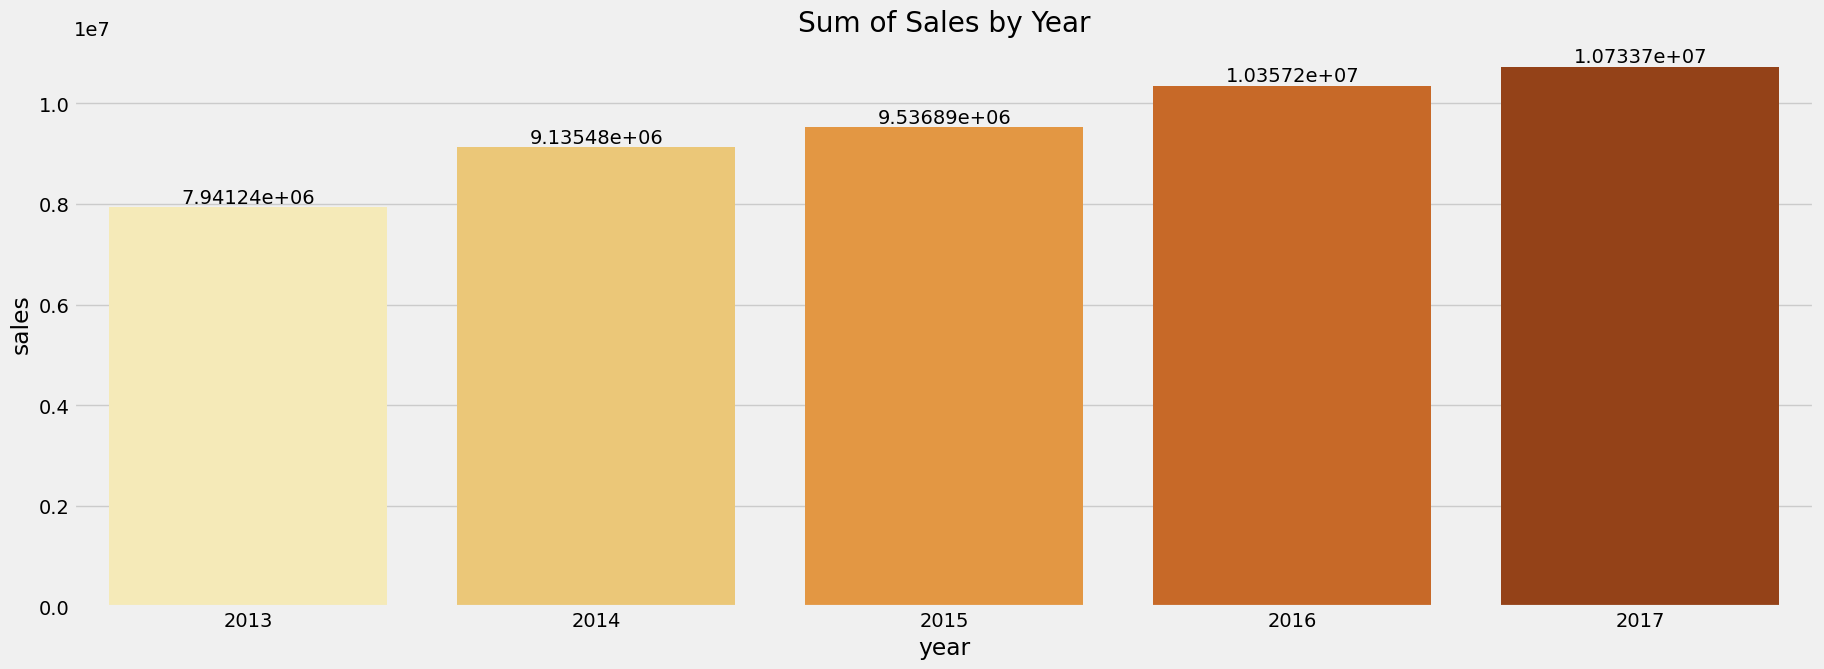

# There is a constant increase in the sales yearly, 2017 has highest sales.


In [16]:
# Grouping Sales by Year

plt.figure(figsize=(20,7))
sales_sum_year = df.groupby('year')['sales'].sum().reset_index()
ax = sns.barplot(data=sales_sum_year, x='year', y='sales', palette='YlOrBr')
plt.bar_label(ax.containers[0])
plt.title('Sum of Sales by Year')
plt.show()

print("# There is a constant increase in the sales yearly, 2017 has highest sales.")

In [17]:
sales_sum_year.head()

,year,sales
0,2013,7941243
1,2014,9135482
2,2015,9536887
3,2016,10357160
4,2017,10733740


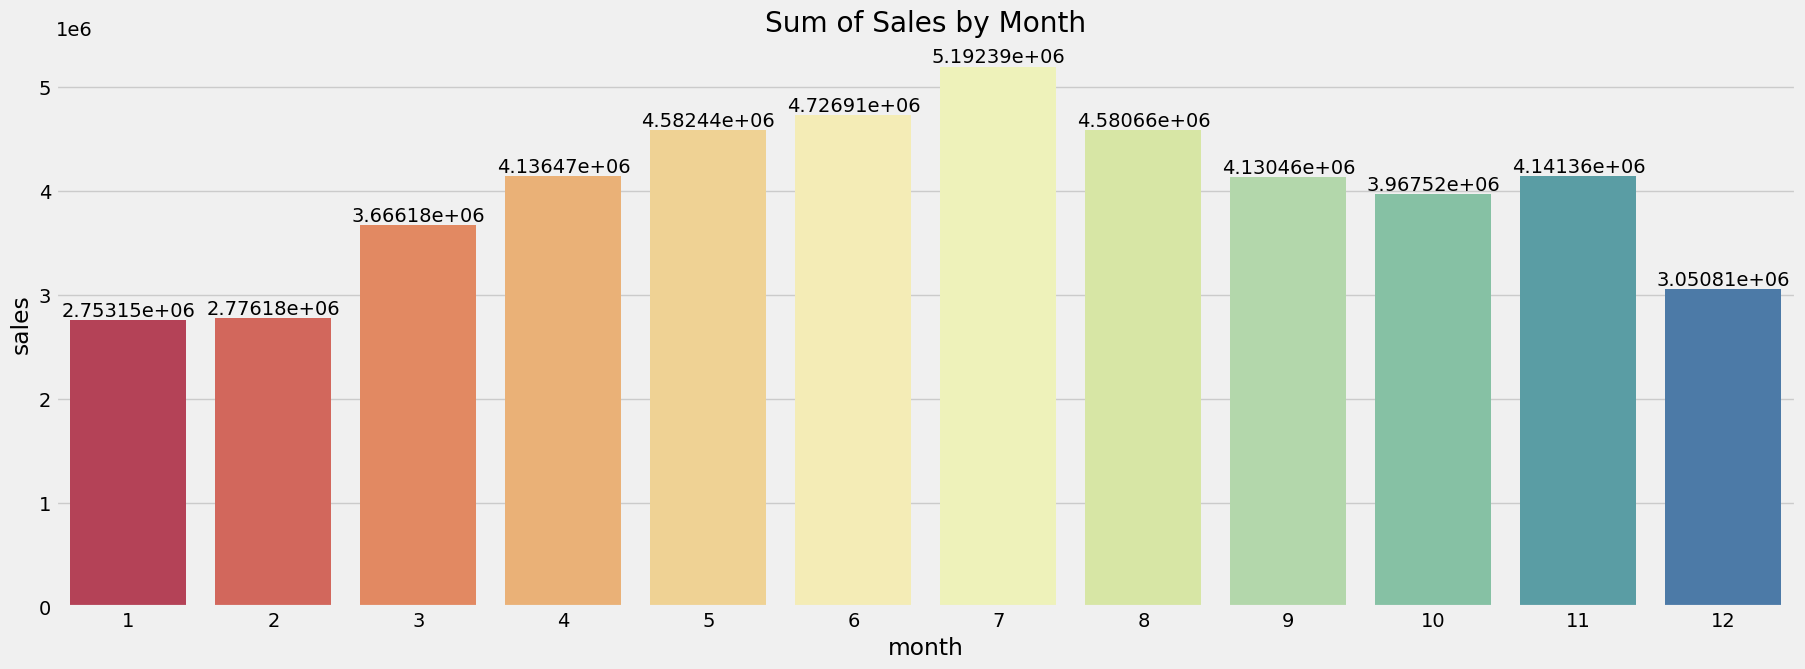

# June, July having most sales every Year.


In [18]:
# Grouping Sales by Month

plt.figure(figsize=(20,7))
sales_sum_month = df.groupby('month')['sales'].sum().reset_index()
ax = sns.barplot(data=sales_sum_month, x='month', y='sales', palette ='Spectral')
#for label in ax.containers:
# ax.bar_label(label)
plt.bar_label(ax.containers[0])
plt.title('Sum of Sales by Month')
plt.show()

print("# June, July having most sales every Year.")

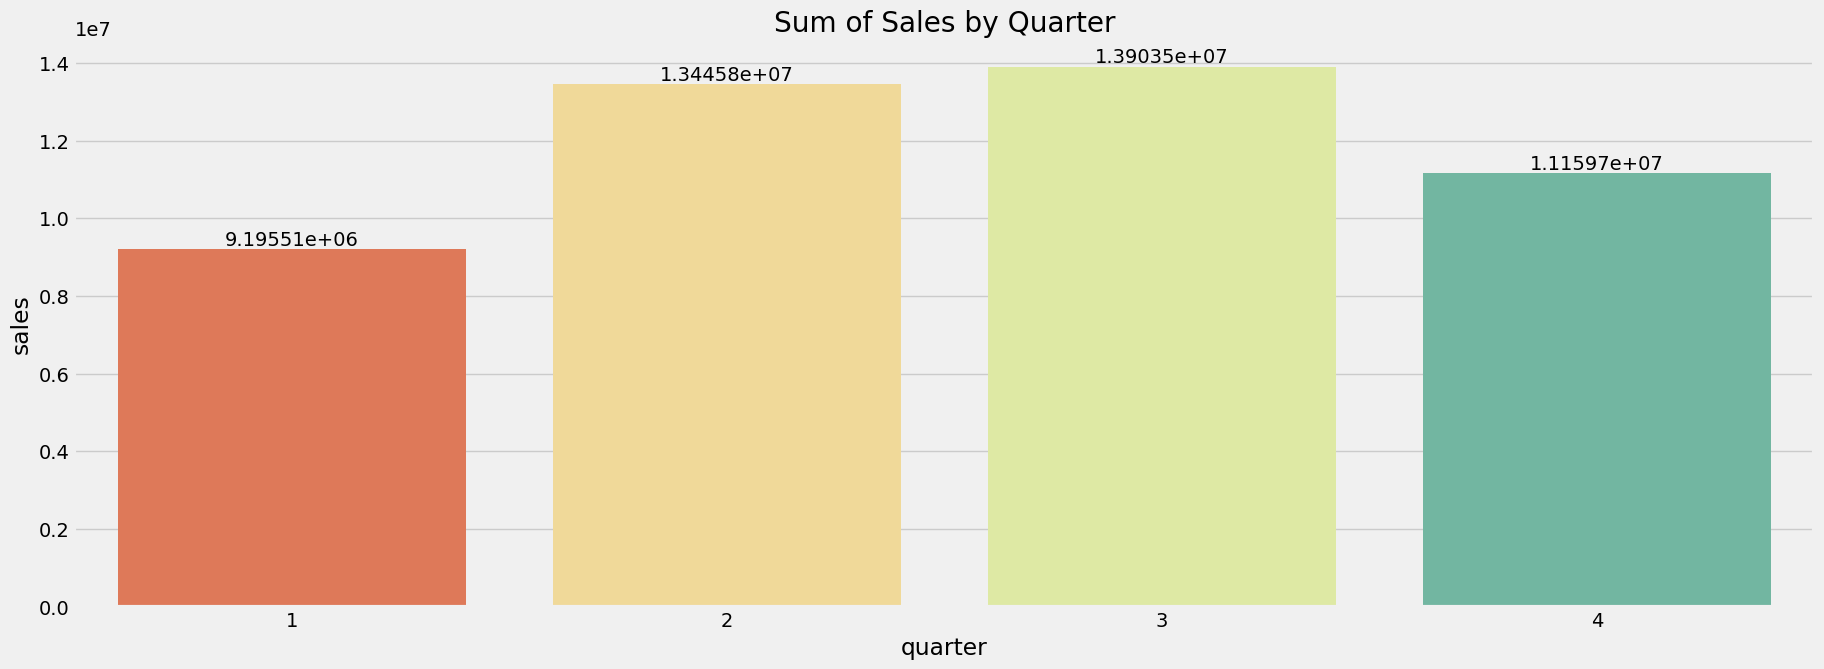

# Every year, Second and Third Quarters are having the highest sales.


In [19]:
# Grouping Sales by Quarter

plt.figure(figsize=(20,7))
sales_sum_quarter = df.groupby('quarter')['sales'].sum().reset_index()
ax = sns.barplot(data=sales_sum_quarter, x='quarter', y='sales', palette='Spectral')
#for label in ax.containers:
# ax.bar_label(label)
plt.bar_label(ax.containers[0])
plt.title('Sum of Sales by Quarter')
plt.show()

print("# Every year, Second and Third Quarters are having the highest sales.")

In [20]:
df = df.groupby('date')['sales'].sum().reset_index()

In [21]:
df = df.set_index('date')
df.head()

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237


In [22]:
# Time Resampling by ('MS') i.e., Month Beginning 

monthly_df = pd.DataFrame()

monthly_df['sales'] = df['sales'].resample('MS').mean()

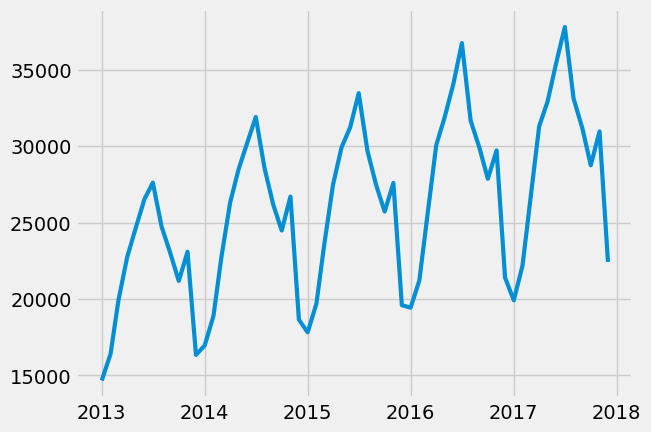

In [23]:
plt.plot(monthly_df.index, monthly_df.sales, lw=3)
plt.show()

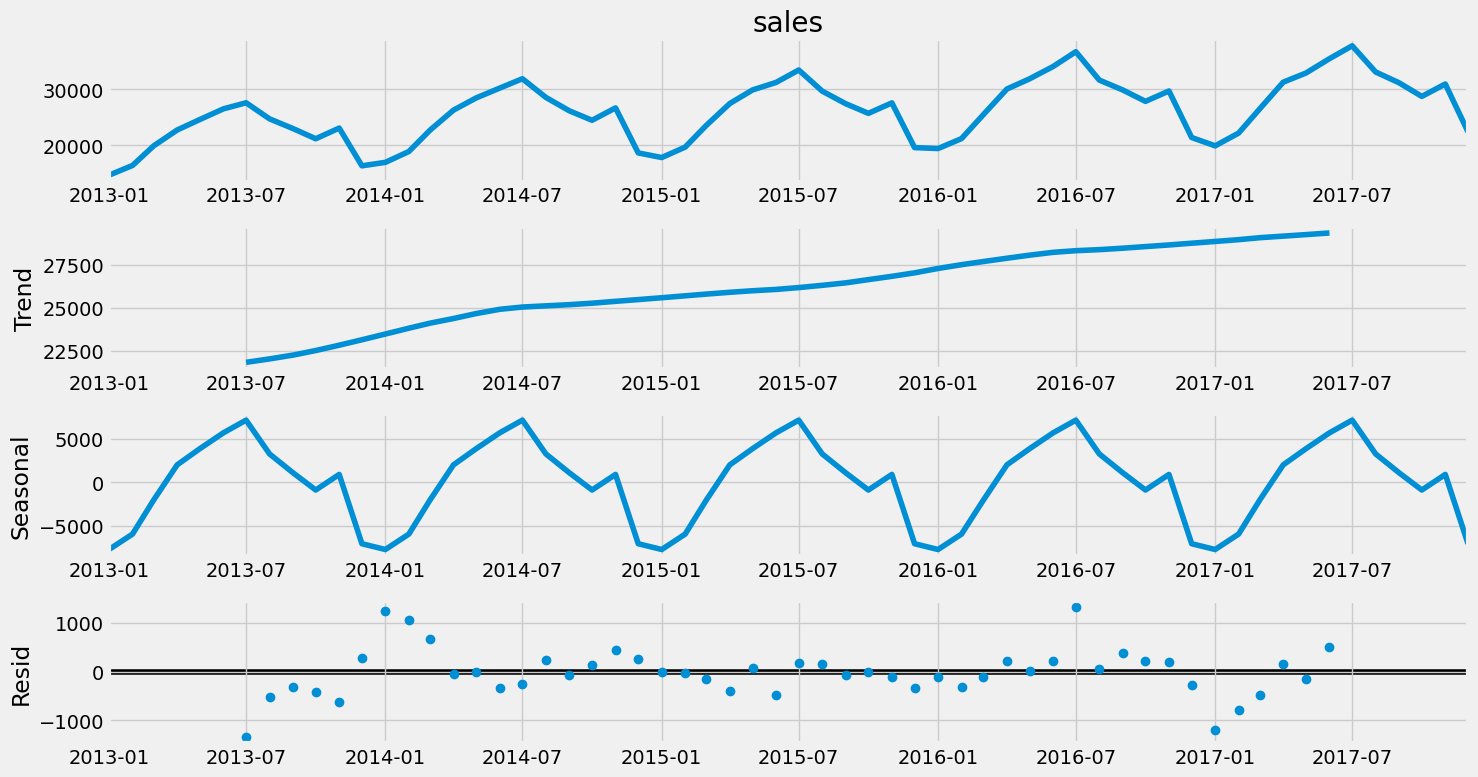

In [24]:
rcParams['figure.figsize'] = 15,8

decomposition = sm.tsa.seasonal_decompose(monthly_df['sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
# Dickey-Fuller Test is used to check stationary in the data

print("Results of Dickey-Fuller Test: ")
df_test = adfuller(monthly_df, autolag ='AIC')
df_output = pd.Series(df_test[0:2], index=['Test Statistic', 'p-value'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Results of Dickey-Fuller Test: 
Test Statistic         -5.382140
p-value                 0.000004
Critical Value (1%)    -3.574589
Critical Value (5%)    -2.923954
Critical Value (10%)   -2.600039
dtype: float64


In [ ]:
Augmented Dickey-Fuller Test:

result=adfuller (df_use['AverageTemperature'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

##### How can we say that our data is stationary?

##### 1. p-value is less than significant value i.e., 0.05.

##### 2. If the ‘Test Statistic’ is less than the ‘Critical Values’, we can reject the null hypothesis and say that the series is stationary.

##### As both the conditions satisy in our problem, we can reject the null hypothesis and say the data is stationary.

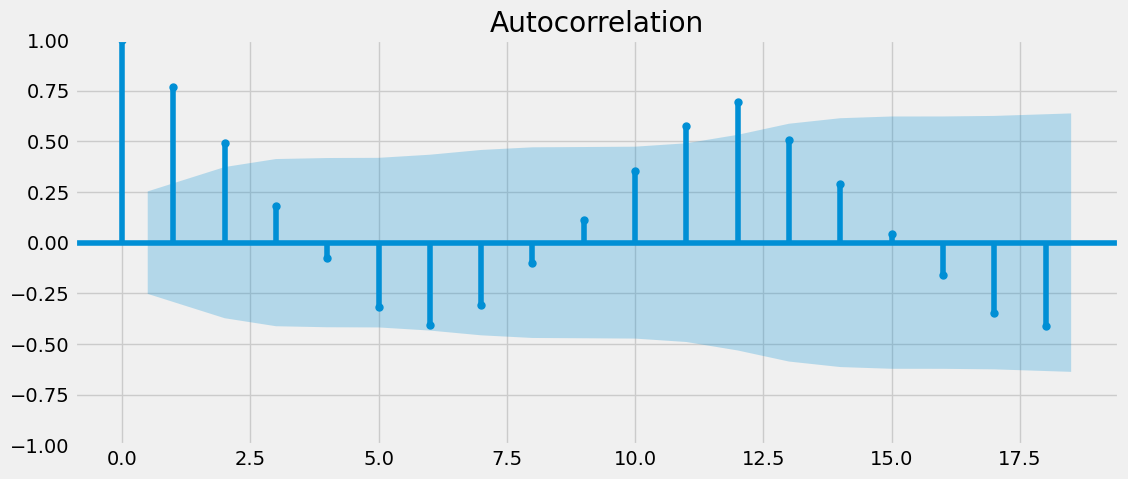

In [26]:
plt.rcParams['figure.figsize'] = (12,5)
plot_acf(monthly_df);

C:\Users\Kamal Rajit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


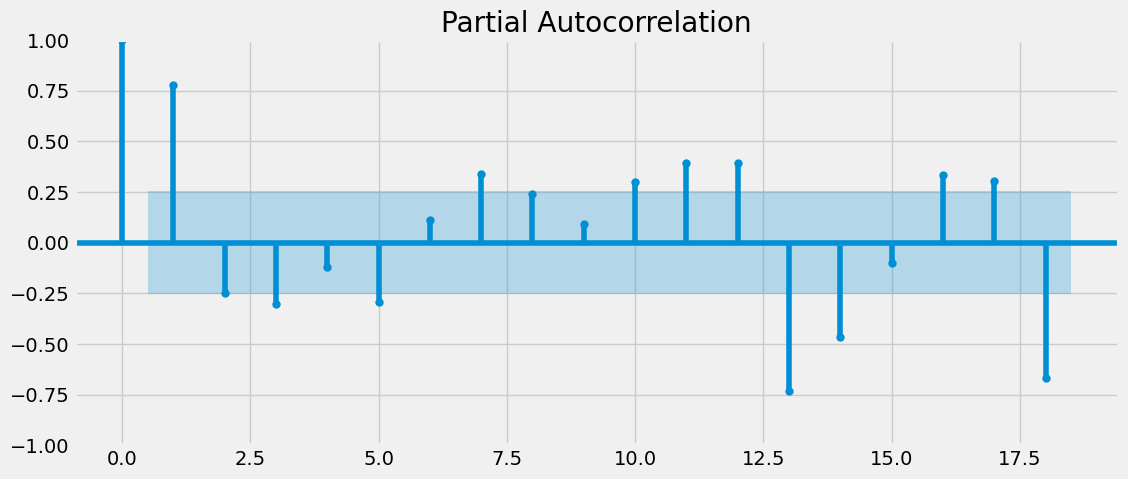

In [27]:
plt.rcParams['figure.figsize'] = (12,5)
plot_pacf(monthly_df);

In [30]:
monthly_df.shape

(60, 1)

In [31]:
# Splitting data into train and test set, 20% is assigned to test data

X = monthly_df

train = X[:48]
test = X[48:]

In [32]:
print('train data length : ', len(train))
print('test  data length : ', len(test))

train data length :  48
test  data length :  12


In [33]:
# p,d,q from acf and pacf plots, to know the order.
# p --> value from  PACF
# d --> differencing
# q --> value from ACF plot

In [34]:
# Using auto_arima to know the best order

auto_arima(X, test='adf', seasonal=True, trace=True, error_action= 'ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1145.942, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1207.548, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1150.068, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1172.522, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1395.242, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1146.069, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1149.288, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1138.867, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1143.601, Time=0.20 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1140.916, Time=0.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1141.911, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1131.628, Time=0.37 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1147.575, Time=0.25 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : 

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True)

In [35]:
model_arima = ARIMA(X, order = (2,0,3)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   60
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -557.016
Date:                Thu, 18 May 2023   AIC                           1128.032
Time:                        19:07:21   BIC                           1142.692
Sample:                    01-01-2013   HQIC                          1133.766
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.609e+04   1002.336     26.025      0.000    2.41e+04    2.81e+04
ar.L1          1.6999      0.039     43.255      0.000       1.623       1.777
ar.L2         -0.9541      0.040    -23.675      0.0

In [36]:
# Predicting values

pred_arima = model_arima.predict(start = len(train), end = (len(X)-1), dynamic = True)
pred_arima

date
2017-01-01    20096.458872
2017-02-01    21880.218189
2017-03-01    23873.678800
2017-04-01    26338.085338
2017-05-01    28625.363701
2017-06-01    30162.186739
2017-07-01    30592.292228
2017-08-01    29857.094335
2017-09-01    28196.926009
2017-10-01    26076.236160
2017-11-01    24055.244510
2017-12-01    22643.136127
Freq: MS, Name: predicted_mean, dtype: float64

In [37]:
# Forecasting the data for the next 12 months

predictions = model_arima.forecast(steps=12)
predictions

2018-01-01    20629.602400
2018-02-01    22012.548811
2018-03-01    23639.473392
2018-04-01    25813.689806
2018-05-01    27957.392244
2018-06-01    29527.028664
2018-07-01    30149.906545
2018-08-01    29711.099979
2018-09-01    28370.844457
2018-10-01    26511.185101
2018-11-01    24628.685187
2018-12-01    23202.943085
Freq: MS, Name: predicted_mean, dtype: float64

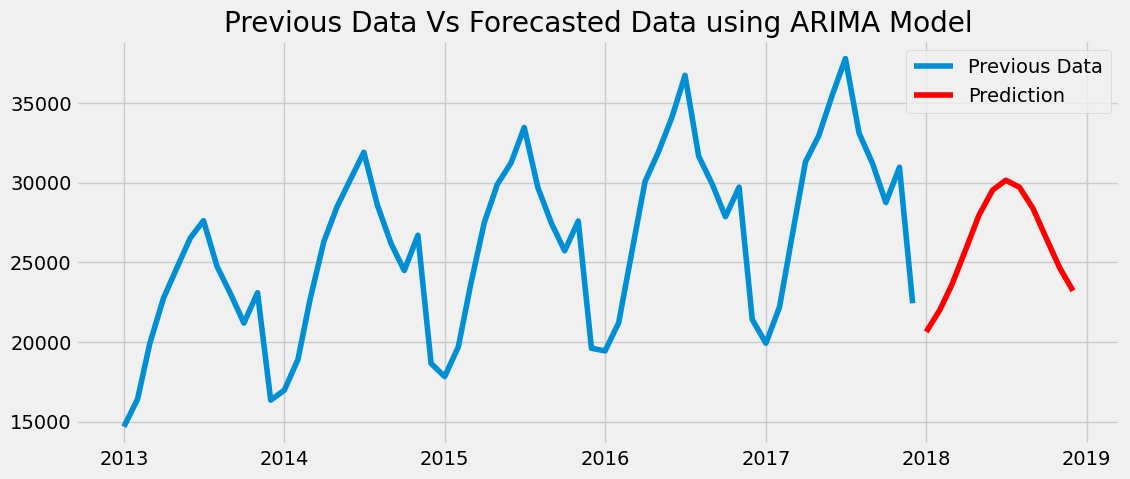

In [38]:
plt.plot(monthly_df)
plt.plot(predictions, color='red')
plt.legend(['Previous Data', 'Prediction'])

plt.title("Previous Data Vs Forecasted Data using ARIMA Model")
plt.show()

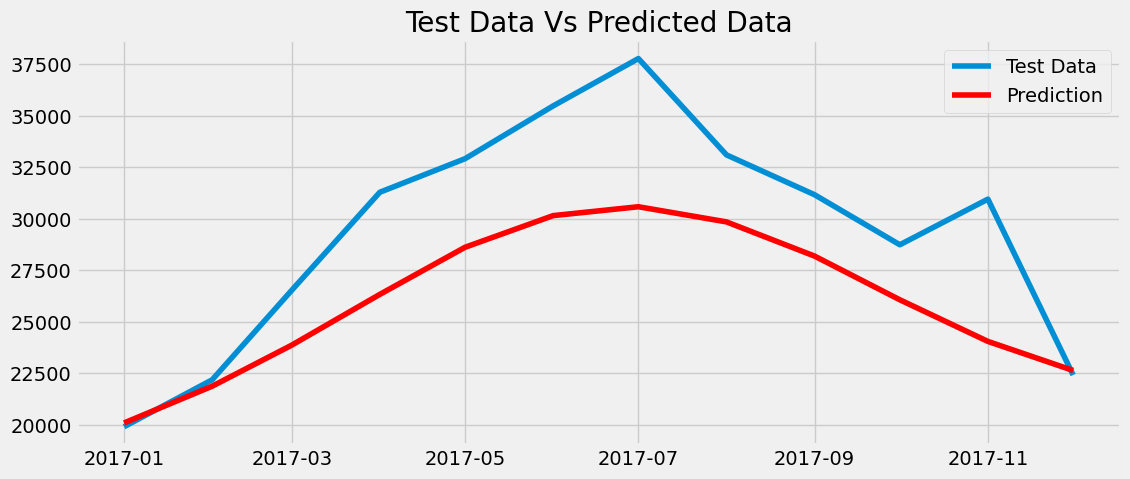

# Model predicted the data very badly i.e. very low accuracy in predicting


In [39]:
# Showing how accurately the model predicted data in accordance with test data using ARIMA Model

plt.plot(test)
plt.plot(pred_arima, color='red')

plt.legend(['Test Data', 'Prediction'])
plt.title("Test Data Vs Predicted Data")
plt.show()

print("# Model predicted the data very badly i.e. very low accuracy in predicting")

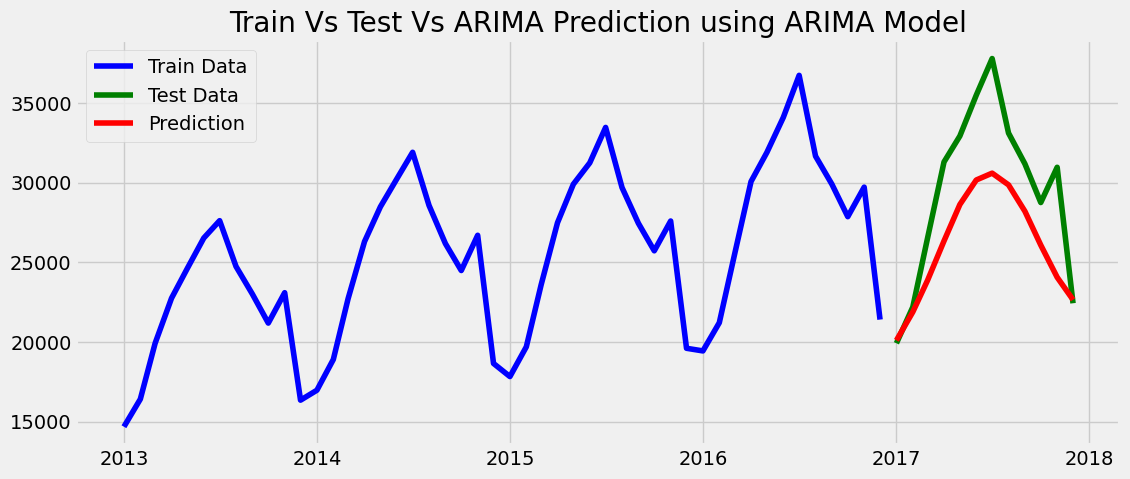

In [40]:
plt.plot(train, label='Train', color ='blue')

plt.plot(test, label= 'Test', color='green')

plt.plot(pred_arima, label='ARIMA prediction', color='red')

plt.legend(['Train Data', 'Test Data', 'Prediction'])
plt.title("Train Vs Test Vs ARIMA Prediction using ARIMA Model")
plt.show()

##### Though the data is showing upward/ positive trend, our ARIMA Model is showing decline in sales for the year 2018. This is due to the using ARIMA Model on Seasonal Data.

### SARMIMAX is used for Seasonal Data.

### SARIMAX

In [41]:
model2 = sm.tsa.statespace.SARIMAX(X, order=(2,0,3), seasonal_order=(2,0,3,12))

model_sarimax = model2.fit()
print(model_sarimax.summary())

C:\Users\Kamal Rajit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kamal Rajit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kamal Rajit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kamal Rajit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: Con

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood                -500.979
Date:                            Thu, 18 May 2023   AIC                           1023.959
Time:                                    19:07:26   BIC                           1046.997
Sample:                                01-01-2013   HQIC                          1032.970
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9998      1.998      1.001      0.317      -1.917       5.916
ar.L2         -0.9998      1.998   

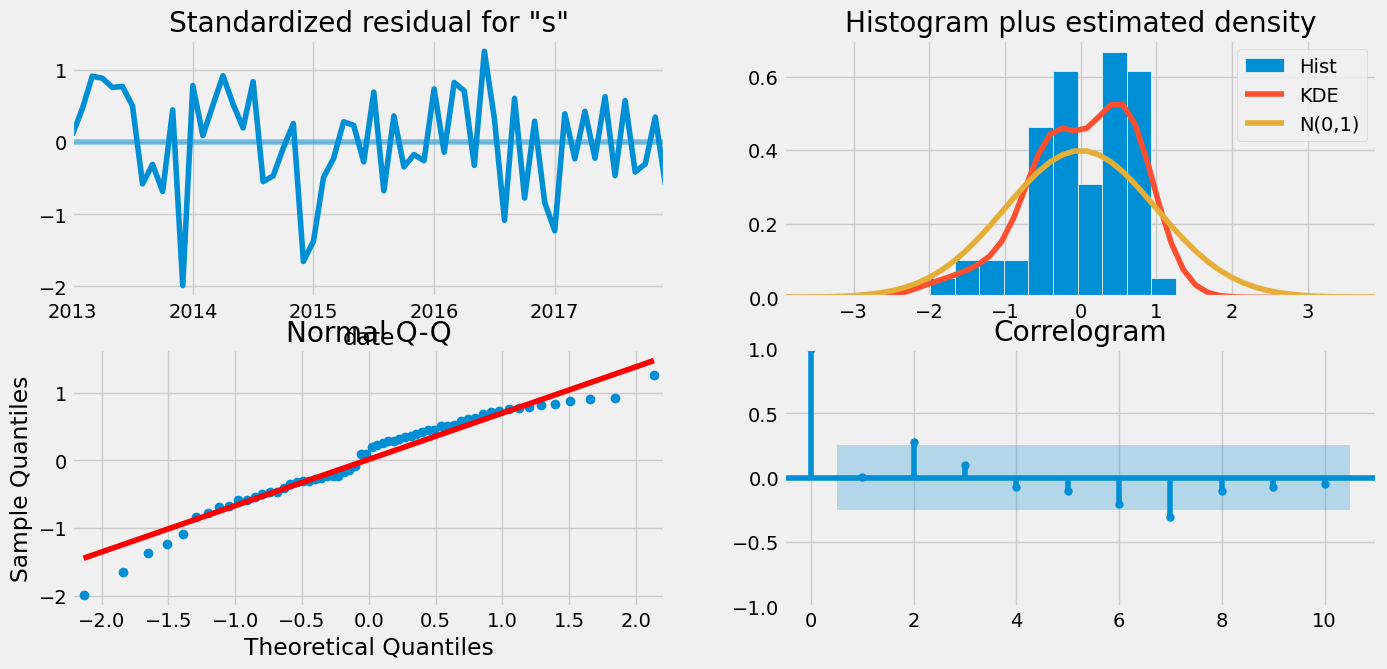

In [42]:
plt.rcParams['figure.figsize'] = (15,7)

model_sarimax.plot_diagnostics()
plt.show()

In [43]:
# Predictions on Test Data

pred_sarimax = model_sarimax.predict(start = len(train), end = (len(X)-1), dynamic = True)
pred_sarimax

date
2017-01-01    21057.600469
2017-02-01    23007.437853
2017-03-01    27185.921814
2017-04-01    31669.895598
2017-05-01    33423.451541
2017-06-01    35534.421093
2017-07-01    38177.936967
2017-08-01    33167.250642
2017-09-01    31457.903495
2017-10-01    29495.489357
2017-11-01    31270.401210
2017-12-01    23173.884016
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
# Forecasting Data for next 12 months using SARIMAX

predictions_sarimax = model_sarimax.forecast(steps=12)
predictions_sarimax

2018-01-01    20710.364366
2018-02-01    23092.924468
2018-03-01    27299.559565
2018-04-01    31981.067138
2018-05-01    33527.746868
2018-06-01    36005.436188
2018-07-01    38298.667419
2018-08-01    33699.814192
2018-09-01    31837.069274
2018-10-01    29482.796151
2018-11-01    31610.859293
2018-12-01    23329.567531
Freq: MS, Name: predicted_mean, dtype: float64

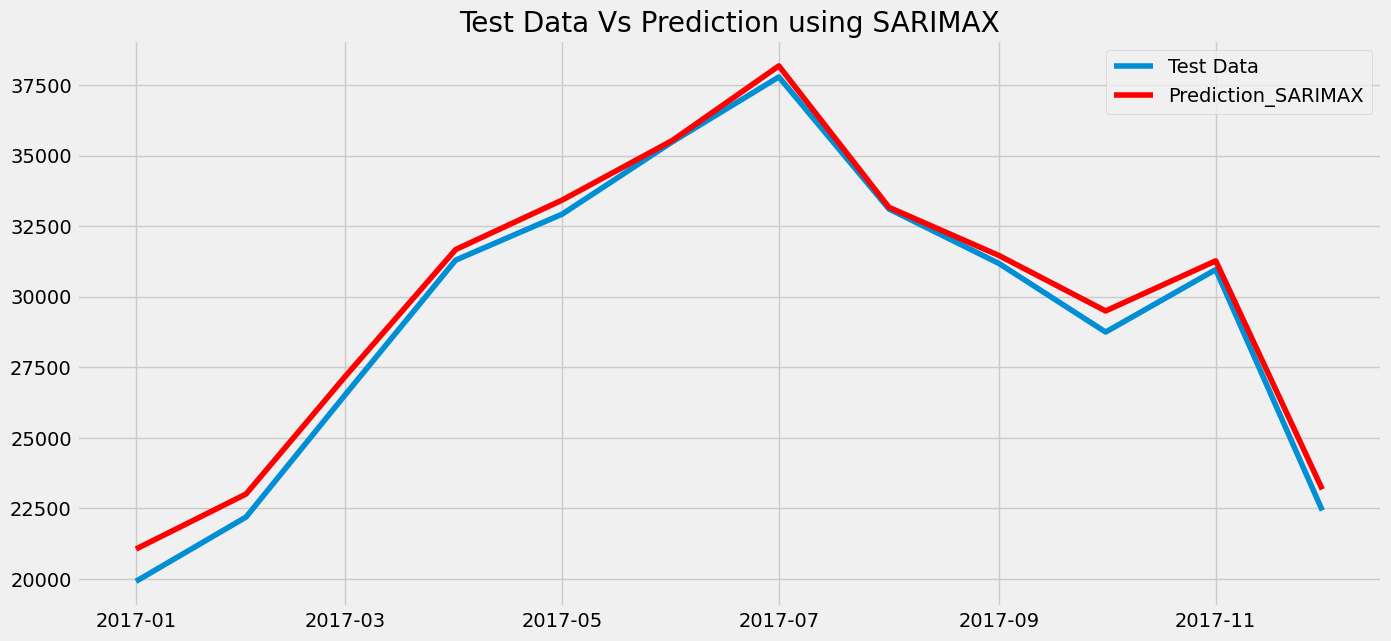

# SARIMAX Model predicted the values on Test Data almost accurately.


In [45]:
# Showing how accurately SARIMAX Model predicted Test Data

plt.plot(test)
plt.plot(pred_sarimax, color='red')

plt.legend(['Test Data', 'Prediction_SARIMAX'])
plt.title("Test Data Vs Prediction using SARIMAX")
plt.show()

print("# SARIMAX Model predicted the values on Test Data almost accurately.")

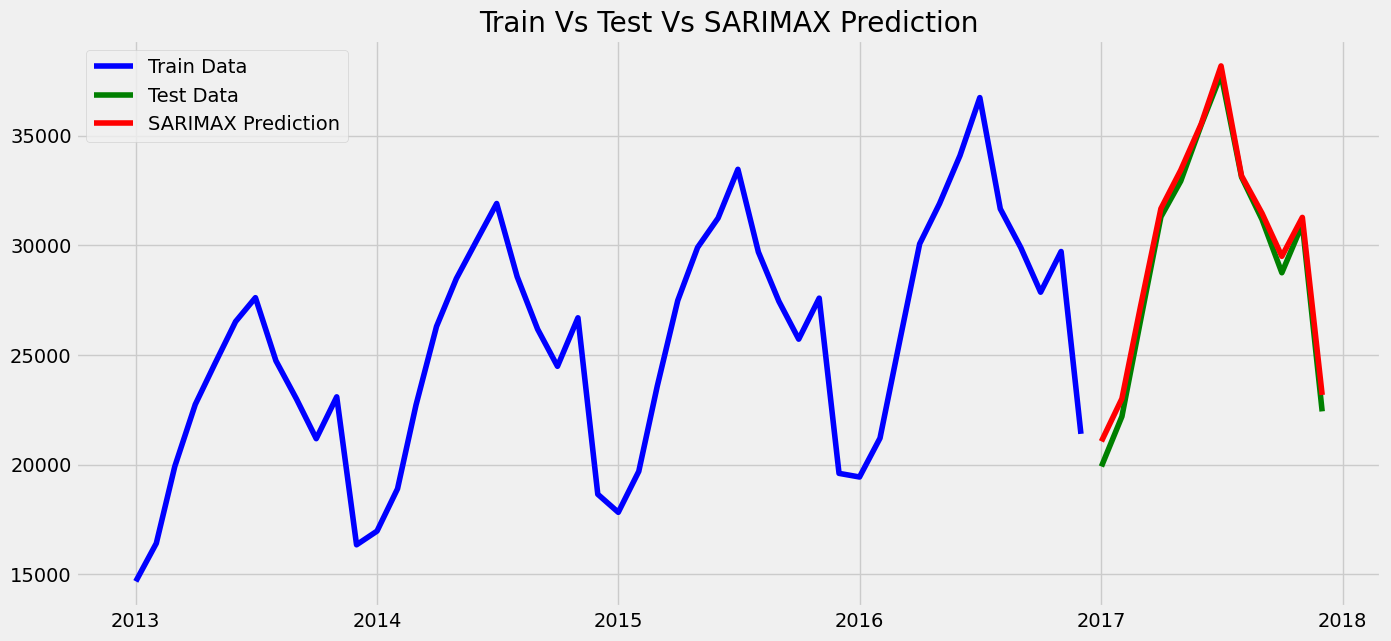

In [46]:
plt.plot(train, label='Train', color ='blue')

plt.plot(test, label= 'Test', color='green')

plt.plot(pred_sarimax, label='SARIMAX prediction', color='red')

plt.legend(['Train Data', 'Test Data', 'SARIMAX Prediction'])
plt.title("Train Vs Test Vs SARIMAX Prediction")
plt.show()

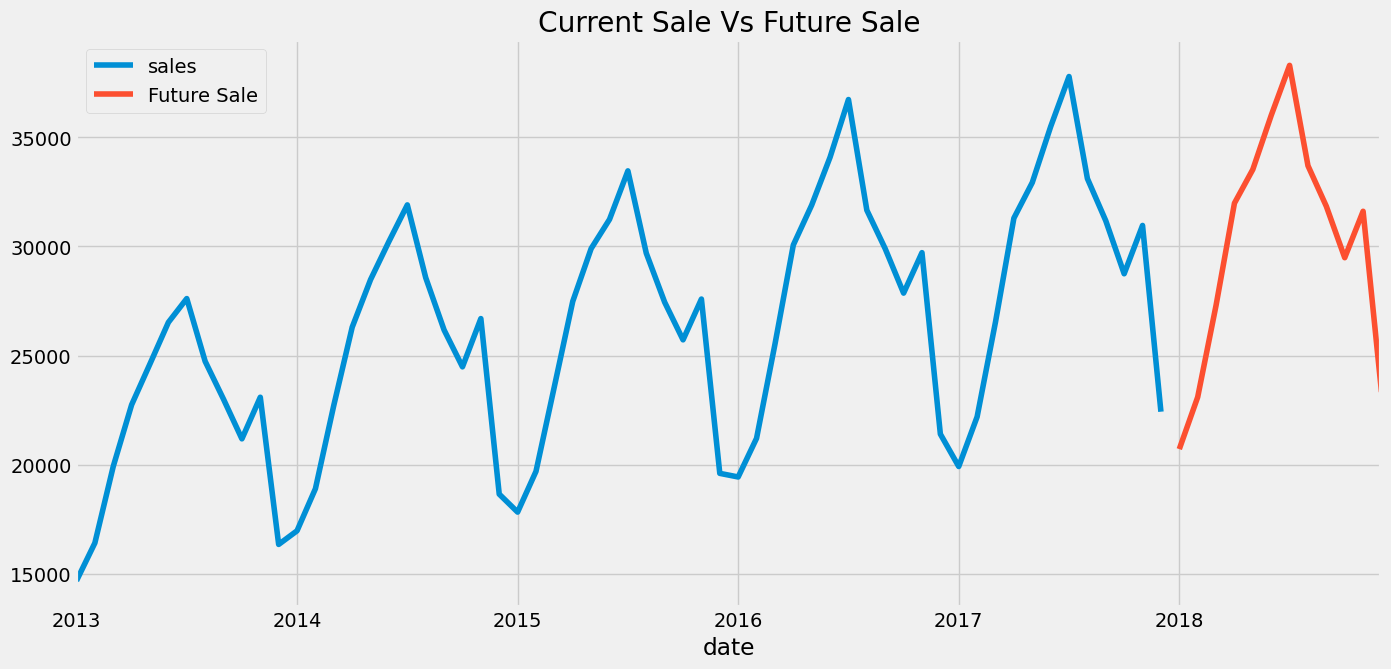

In [47]:
X.plot(legend=True, label='Current Sale')

predictions_sarimax.plot(legend= True, label='Future Sale')

plt.title("Current Sale Vs Future Sale")
plt.show()

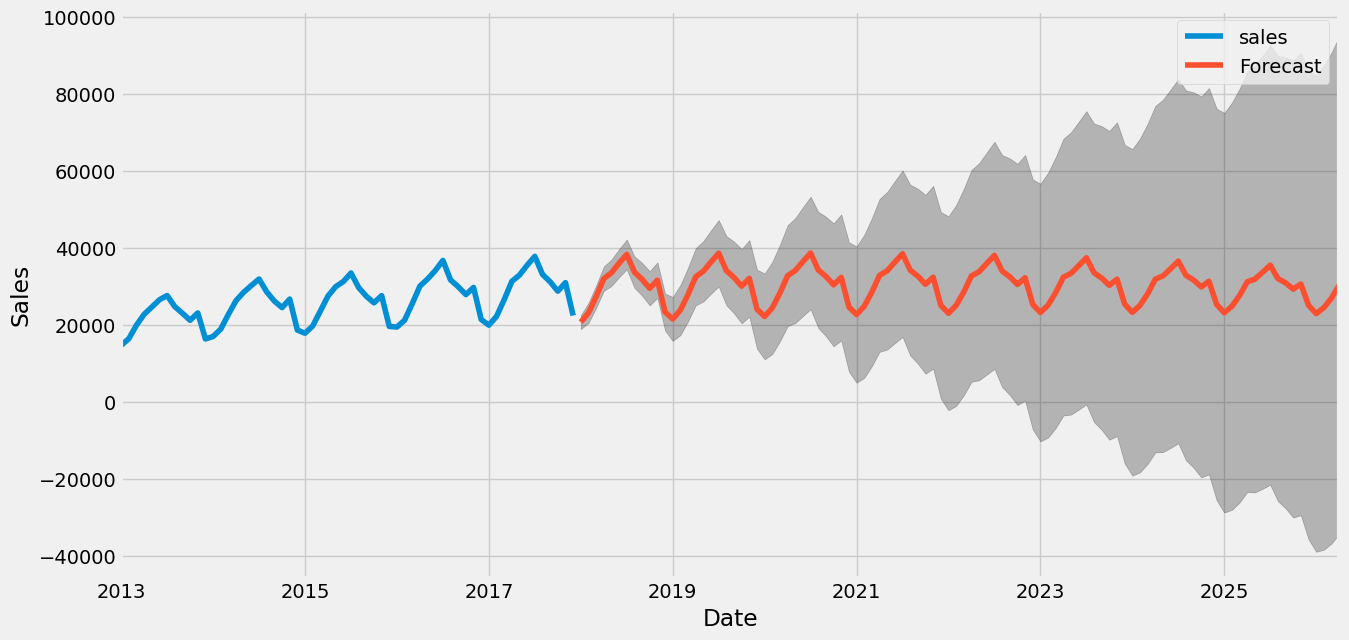

In [48]:
pred_uc = model_sarimax.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = X.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [49]:
# Monthly Sales for next 12 months

predictions_sarimax = model_sarimax.forecast(steps=12)
predictions_sarimax

2018-01-01    20710.364366
2018-02-01    23092.924468
2018-03-01    27299.559565
2018-04-01    31981.067138
2018-05-01    33527.746868
2018-06-01    36005.436188
2018-07-01    38298.667419
2018-08-01    33699.814192
2018-09-01    31837.069274
2018-10-01    29482.796151
2018-11-01    31610.859293
2018-12-01    23329.567531
Freq: MS, Name: predicted_mean, dtype: float64

In [50]:
# Monthly Sales for next 24 months

predictions_sarimax = model_sarimax.forecast(steps=24)
predictions_sarimax

2018-01-01    20710.364366
2018-02-01    23092.924468
2018-03-01    27299.559565
2018-04-01    31981.067138
2018-05-01    33527.746868
2018-06-01    36005.436188
2018-07-01    38298.667419
2018-08-01    33699.814192
2018-09-01    31837.069274
2018-10-01    29482.796151
2018-11-01    31610.859293
2018-12-01    23329.567531
2019-01-01    21526.423489
2019-02-01    23831.603321
2019-03-01    27887.198688
2019-04-01    32480.034736
2019-05-01    33924.715565
2019-06-01    36325.855168
2019-07-01    38603.338392
2019-08-01    34087.104074
2019-09-01    32312.287924
2019-10-01    30034.223314
2019-11-01    32069.570018
2019-12-01    24076.153370
Freq: MS, Name: predicted_mean, dtype: float64